# Data Processing for Temoa Models

Solution to bar graph hatches from [here](https://stackoverflow.com/questions/22833404/how-do-i-plot-hatched-bars-using-pandas/48507993)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv

years = [i for i in range(2021, 2031)]
idx = np.asarray([i for i in range(len(years))])
plt.rcParams['figure.figsize'] = (12,9)
bau_path = "~/research/temoa_data/bottomupv2/09-adds_co2activity/"

In [2]:
bau_emissions = read_csv(bau_path+"bau_emissions.csv", parse_dates=True, index_col='Technologies')
bau_emissions

,ABBOTT,IMPELC
Technologies,,
2021-01-01,216.567470,226.034044
2022-01-01,219.968619,211.451571
2023-01-01,223.369768,211.562347
2024-01-01,226.870321,211.669125
2025-01-01,230.342124,211.789441
2026-01-01,233.871423,211.882680
2027-01-01,211.019603,234.914722
2028-01-01,212.039293,225.313713
2029-01-01,215.639247,222.892727


In [3]:
bau_activity = read_csv(bau_path+"bau_activity.csv", parse_dates=True, index_col='Year')
bau_activity

,IMPELC,IMPSOL,IMPWIND,TURBINE
Year,,,,
2021-01-01,273.980659,6.88,23.350000,174.489341
2022-01-01,256.304934,24.69,23.350000,178.355065
2023-01-01,256.439209,24.69,23.350000,182.220790
2024-01-01,256.568636,24.69,23.350000,186.191360
2025-01-01,256.714474,24.69,23.350000,190.145524
2026-01-01,256.827491,24.69,23.350000,194.132508
2027-01-01,284.745117,24.69,40.987940,152.776944
2028-01-01,273.107531,24.69,57.251934,152.450534
2029-01-01,270.173002,24.69,60.311043,156.525954


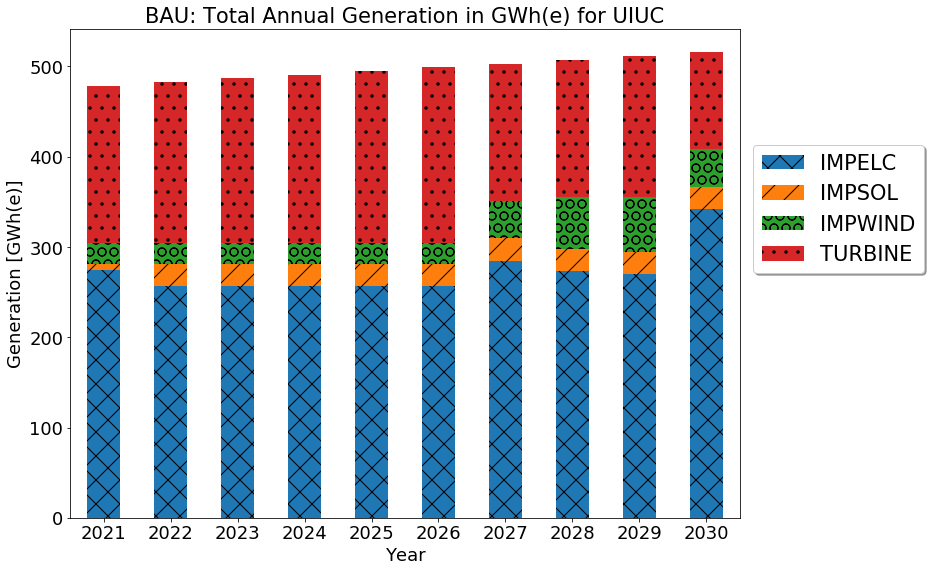

In [38]:
import matplotlib.dates as mdates

years = [i for i in range(2021, 2031)]
idx = np.asarray([i for i in range(len(years))])
# years = mdates.YearLocator()   # every year
# years_fmt = mdates.DateFormatter('%Y')
ax = bau_activity.plot.bar(stacked=True)
plt.title("BAU: Total Annual Generation in GWh(e) for UIUC", fontsize=21)
plt.ylabel("Generation [GWh(e)]", fontsize=18)
plt.xlabel("Year", fontsize=18)

# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(years_fmt)
# plt.gcf().autofmt_xdate()

bars = ax.patches
hatches = ''.join(h*len(bau_activity) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax.set_xticks(idx)
ax.set_xticklabels(years, rotation=0, fontsize=18)
# ax.set_xticklabels(years, fontsize=18)
plt.yticks(fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
# locator = mdates.YearLocator()  # every month
# # Specify the format - %b gives us Jan, Feb...
# fmt = mdates.DateFormatter('%b')

# X = plt.gca().xaxis
# X.set_major_locator(locator)
# # Specify formatter
# X.set_major_formatter(fmt)
plt.show()

In [39]:
bau_emissions['total'] = bau_emissions['ABBOTT'] + bau_emissions['IMPELC']
bau_emissions

,ABBOTT,IMPELC,total
Technologies,,,
2021-01-01,216.567470,226.034044,442.601514
2022-01-01,219.968619,211.451571,431.420190
2023-01-01,223.369768,211.562347,434.932115
2024-01-01,226.870321,211.669125,438.539445
2025-01-01,230.342124,211.789441,442.131565
2026-01-01,233.871423,211.882680,445.754103
2027-01-01,211.019603,234.914722,445.934324
2028-01-01,212.039293,225.313713,437.353007
2029-01-01,215.639247,222.892727,438.531974


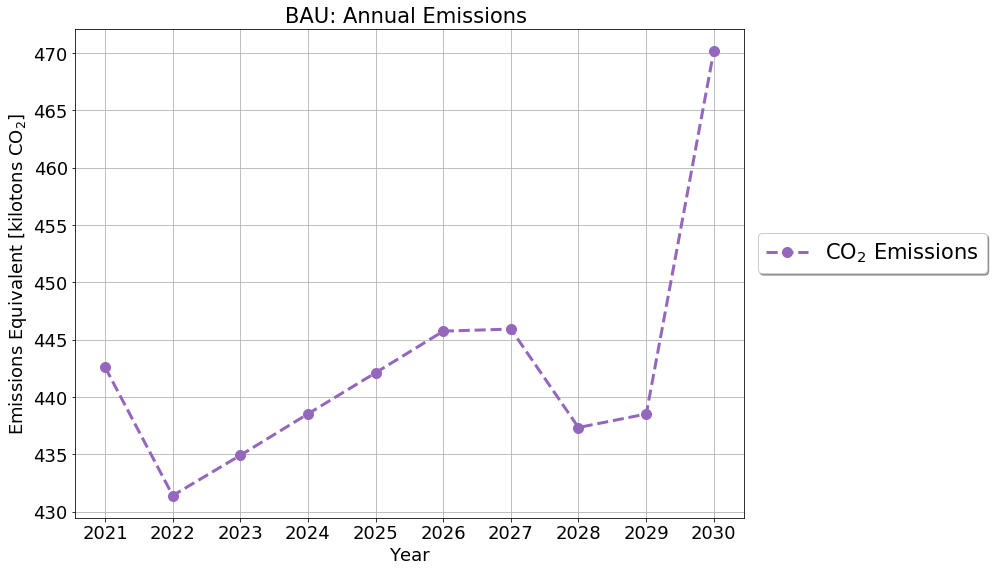

In [46]:
fig, ax = plt.subplots()

ax.plot(bau_emissions.index, 
         bau_emissions.total,
         lw=3, linestyle = '--',
         marker='o',
         markersize=10,
         color='tab:purple', 
         label='CO$_2$ Emissions')
plt.title('BAU: Annual Emissions ', fontsize=21)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Emissions Equivalent [kilotons CO$_2$]', fontsize=18)
# ax.set_xticks(idx)
# ax.set_xticklabels(years, rotation=65, fontsize=18)
ax.legend(loc=(1.02,0.5),fancybox=True, shadow=True, fontsize=12,prop={'size': 21})
plt.grid()
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()